In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
survey_raw_df = pd.read_csv('data/survey_results_public.csv', index_col='ResponseId')

In [3]:
schema_raw = pd.read_csv('data/survey_results_schema.csv', index_col='qname')['question']

In [4]:
survey_raw_df.columns

Index(['MainBranch', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel',
       'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool',
       'Country', 'Currency', 'CompTotal', 'CompFreq',
       'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'OpSysProfessional use', 'OpSysPersonal use', 'VersionControlSystem',
       'VCInteraction', 'VCHostingPersonal use', 'VCHostingProfessional use',
       'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith',
       'OfficeStackSyncHaveWorkedWith', 'OfficeStack

In [5]:
schema_raw.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

In [6]:
schema_raw['CompTotal']

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [7]:
schema_raw['CompFreq']

'Is that compensation weekly, monthly, or yearly?'

In [8]:
survey_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73268 entries, 1 to 73268
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MainBranch                      73268 non-null  object 
 1   Employment                      71709 non-null  object 
 2   RemoteWork                      58958 non-null  object 
 3   CodingActivities                58899 non-null  object 
 4   EdLevel                         71571 non-null  object 
 5   LearnCode                       71580 non-null  object 
 6   LearnCodeOnline                 50685 non-null  object 
 7   LearnCodeCoursesCert            29389 non-null  object 
 8   YearsCode                       71331 non-null  object 
 9   YearsCodePro                    51833 non-null  object 
 10  DevType                         61302 non-null  object 
 11  OrgSize                         51039 non-null  object 
 12  PurchaseInfluence               

In [9]:
pd.set_option('display.max_columns', 78)

In [10]:
pd.set_option('display.max_rows', 78)

In [11]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [12]:
survey_df = survey_raw_df[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [13]:
survey_df['YearsCode'].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [14]:
# NaN의 개수를 알려주는 함수
def count_nan(series):
    return len(series)-series.count()

In [15]:
count_nan(survey_df['YearsCode'])

1937

YearsCode의 column을 'Less than 1 year'의 값은 0으로 변경하고 'More than 50 years'의 값은 51로 일괄적으로 변경하려고 합니다.  
또 dtype을 float로 변경하고 이를 survey_df['YearsCode']에 적용해보세요,

In [16]:
survey_df['YearsCode'].replace('Less than 1 year', 0, inplace=True)

In [17]:
survey_df['YearsCode'].replace('More than 50 years', 51, inplace=True)

In [18]:
survey_df['YearsCode']= survey_df['YearsCode'].astype(float)

In [19]:
survey_df['YearsCode']

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [20]:
survey_df['YearsCodePro'].replace('Less than 1 year', 0, inplace=True)
survey_df['YearsCodePro'].replace('More than 50 years', 51, inplace=True)

In [21]:
survey_df['YearsCodePro']= survey_df['YearsCodePro'].astype(float)

In [22]:
survey_df['YearsCodePro']

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [23]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


In [24]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [25]:
schema_raw['Gender']

'Which of the following describe you, if any? Please check all that apply.'

np.nan값이 섞인 Series자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는 메서드로 contains()가 있다.  
첫 인자로 포함된 것을 찾을 문자열을 넣어준다.
na 키워드 인수를 활용하면 NaN값을 대신할 값 삽입가능

In [26]:
survey_df['Gender'].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

In [27]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na = False)), np.nan, inplace=True)

앞의 두 메서드를 활용하면 ;을 포함하는 row를 NaN 값으로 변경 가능  
'~'은 비트연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False는 True로 반전해주는 역할

In [28]:
survey_df['Gender'].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

변활을 마치고 나면 성별로 1개의 값만 선택한 선택지만 남은 것을 확인할 수 있습니다.

In [29]:
%matplotlib inline

In [30]:
sns.set_style('darkgrid')

In [31]:
mpl.rcParams['font.size'] = 14 # 기본 폰트의 크기를 적용합니다.

In [32]:
mpl.rcParams['figure.figsize'] = (9,5) # 기본 figure의 사이즈를 적용합니다.

In [33]:
mpl.rcParams['figure.facecolor'] = '#00000000' # 기본 figure 내 배경 색상을 흰색(#000000)으로 적용합니다.

In [34]:
# 폰트 변경

import matplotlib.font_manager as font_manager
import matplotlib as mpl
# Add every font at the specified location
font_dir = ['/Users/leebyeongho/Desktop/python/font']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'Sunflower'
print(mpl.rcParams['font.family'])

Explora
Sunflower
['Sunflower']


In [35]:
mpl.rcParams['font.family'] = 'Sunflower'

In [36]:
mpl.rcParams['axes.unicode_minus'] = False

In [37]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [38]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

In [39]:
survey_df['Country'].nunique()

180

Country에 대한 유일한 값의 개수를 확인합니다. NaN값은 count에 포함하지 않습니다.

In [40]:
top_countries = survey_df['Country'].value_counts().head(15)

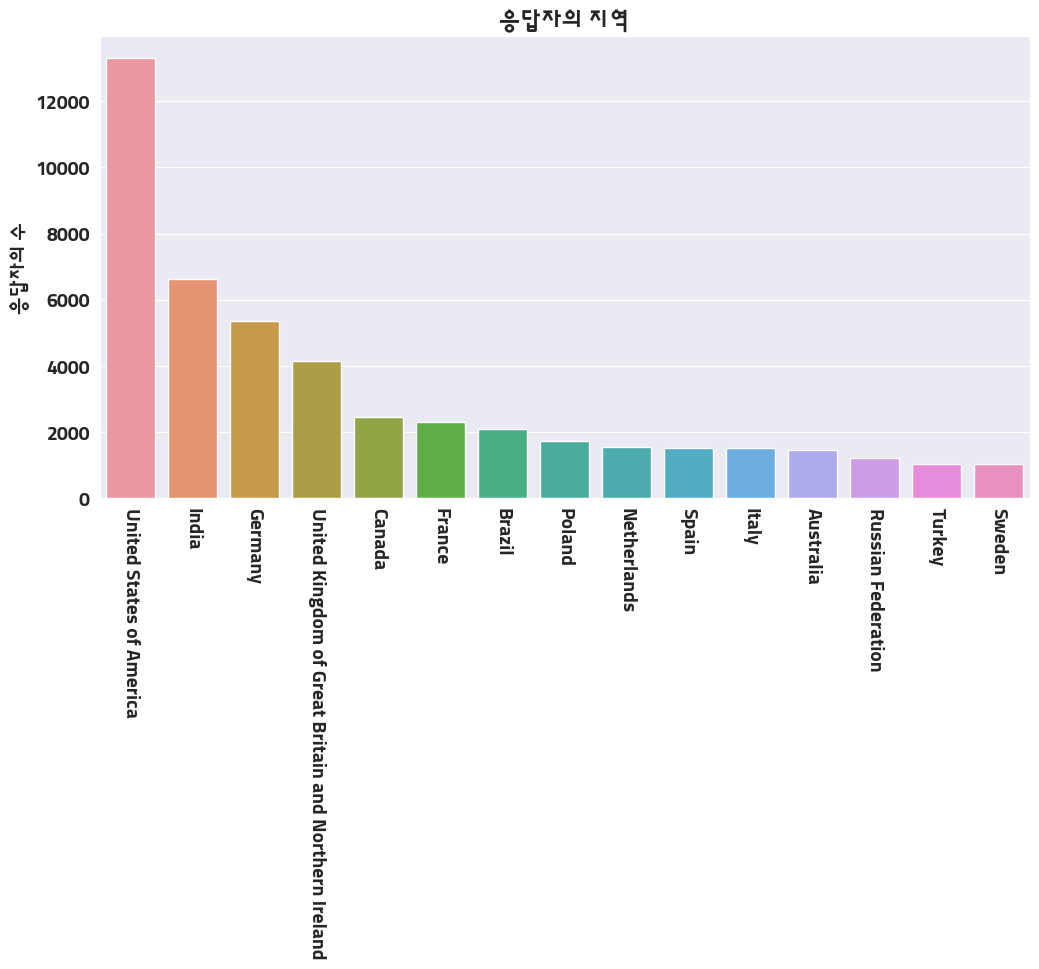

In [41]:
plt.figure(figsize=(12,6))
plt.title('응답자의 지역')
sns.barplot(x=top_countries.index ,y=top_countries)
plt.xticks(rotation=270)
plt.ylabel('응답자의 수')
plt.show()

In [42]:
schema_raw["Age"]

'What is your age?'

In [43]:
count_nan(survey_df["Age"])

3011

In [44]:
age_count = survey_df["Age"].value_counts()
age_count

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [45]:
survey_df["Age"].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [46]:
survey_df["Age"].nunique()

8

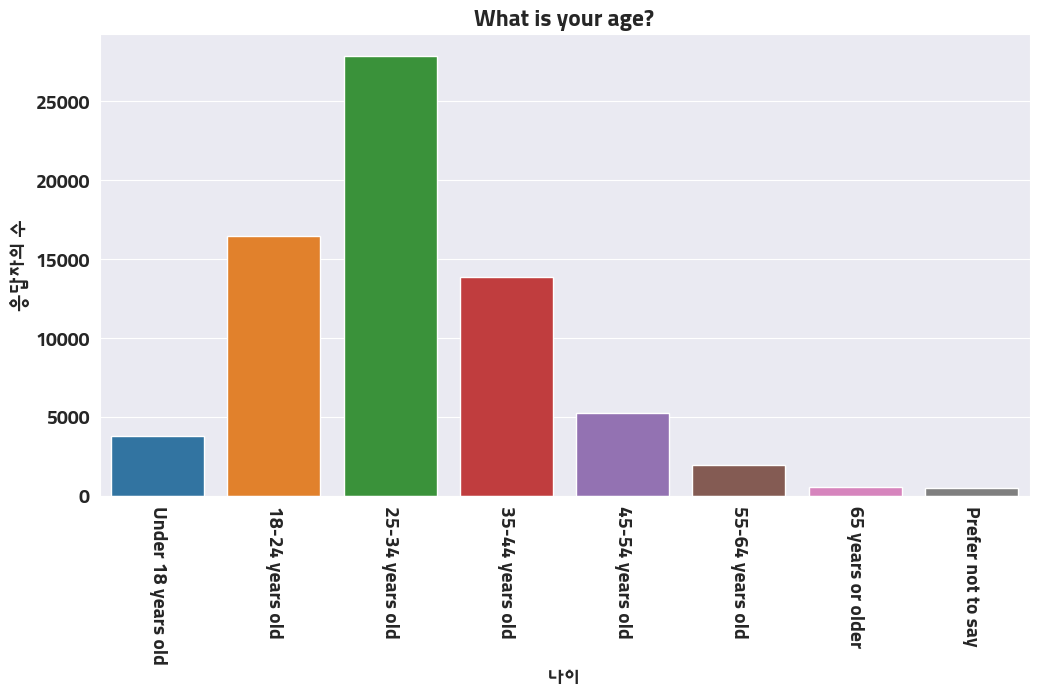

In [47]:
plt.figure(figsize=(12,6)) # figure사이즈를 12x6으로 설정
plt.title('What is your age?')
sns.barplot(x=age_count.index,order=["Under 18 years old","18-24 years old","25-34 years old","35-44 years old",
                                     "45-54 years old","55-64 years old","65 years or older","Prefer not to say"],y=age_count)
plt.xticks(rotation=270)
plt.xlabel('나이')
plt.ylabel('응답자의 수')
plt.show()

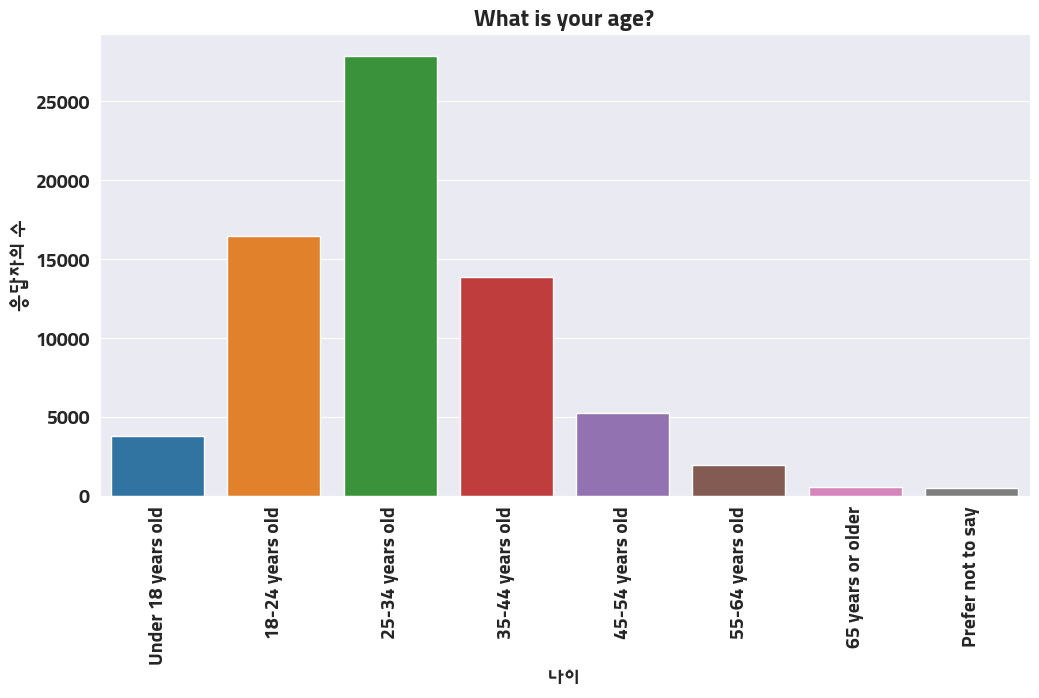

In [48]:
plt.figure(figsize=(12, 6)) # figure 사이즈를 12 X 6으로 설정
plt.title(schema_raw["Age"])
sns.countplot(data=survey_df, x='Age', order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say'])
plt.xticks(rotation=90) # 90도로 회전시키기
plt.xlabel("나이")
plt.ylabel("응답자의 수")
plt.show()

In [49]:
survey_df.where(~(survey_df['Gender'].str.contains(';', na = False)), np.nan, inplace=True)

In [50]:
# axes만 색상 변경하는 법
# plt.style.use("default") 로 변경해줘야 함
mpl.rcParams["axes.facecolor"] = "white"

In [51]:
a = survey_df['Gender'].value_counts()/survey_df['Gender'].value_counts().sum()

In [52]:
b =survey_df['Gender'].value_counts().index

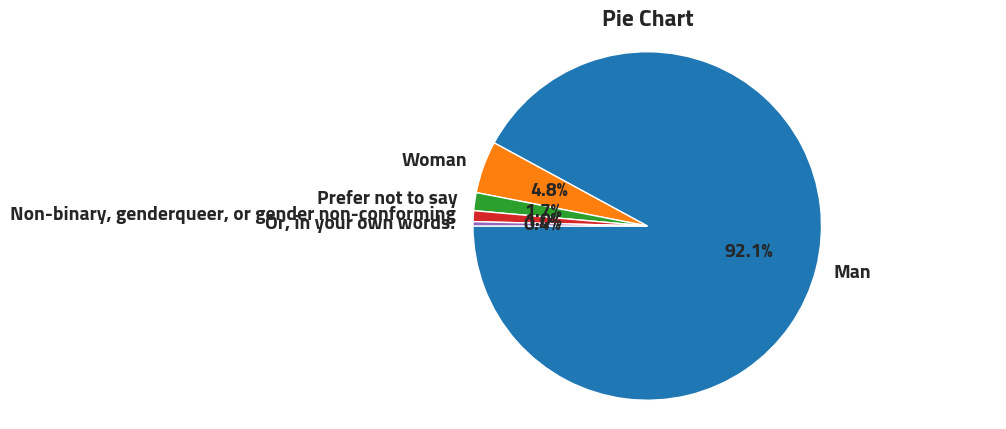

In [53]:
plt.title('Pie Chart')
plt.pie(a, labels=b, autopct='%1.1f%%', startangle=180)
plt.axis('equal')
plt.show()

In [54]:
schema_raw["EdLevel"]

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [55]:
Ed=survey_df["EdLevel"].value_counts()

<AxesSubplot:xlabel='EdLevel'>

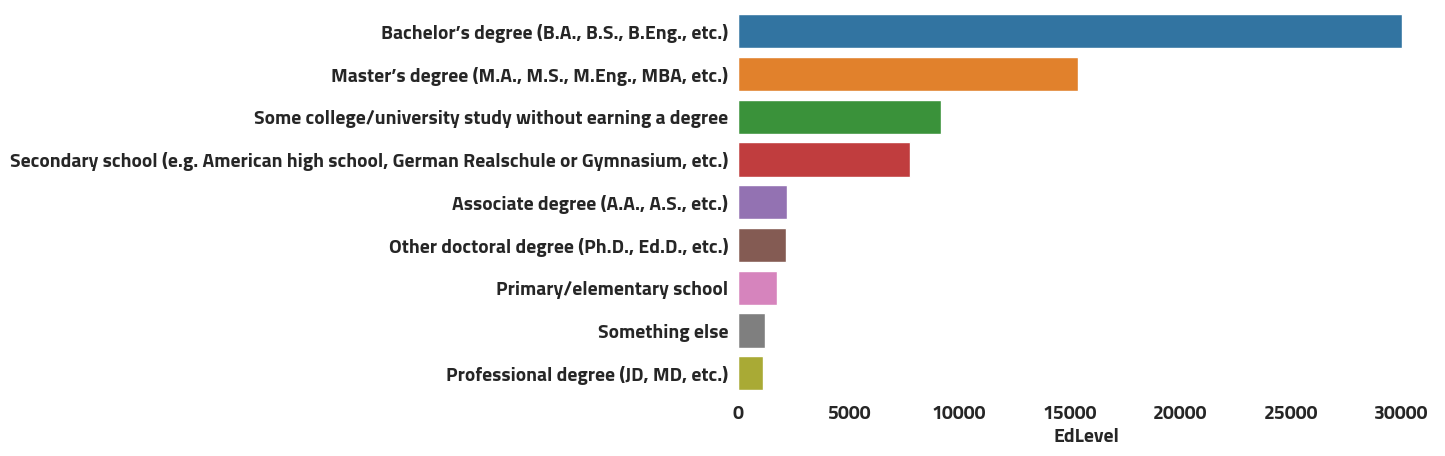

In [56]:
sns.barplot(x=Ed, y=Ed.index)

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

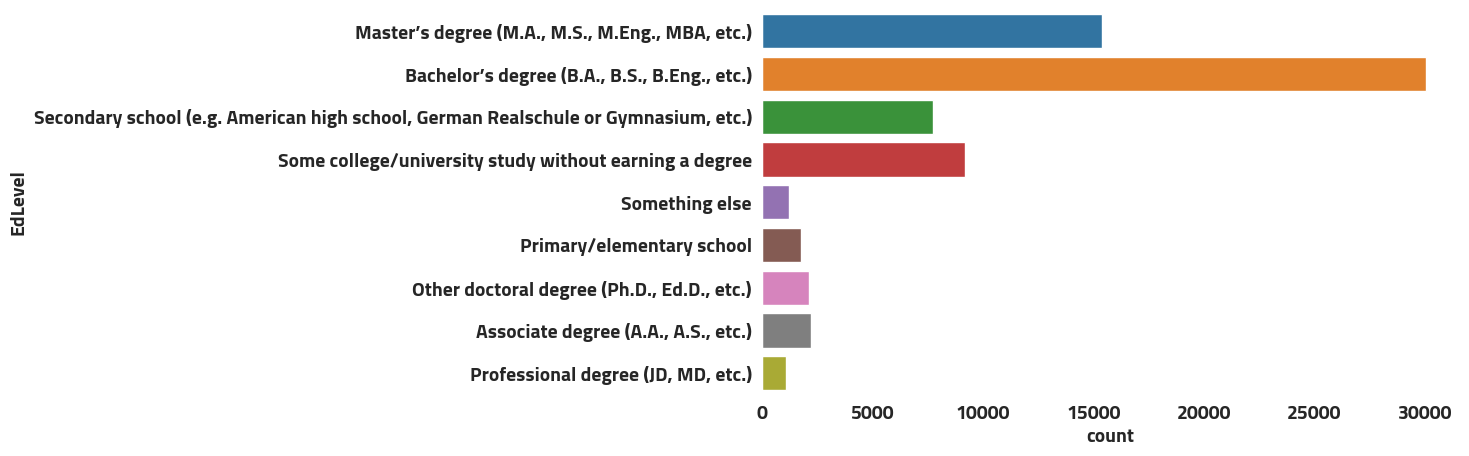

In [57]:
sns.countplot(y=survey_df["EdLevel"])

두 plot는 비슷하게 생겼지만 countplot에는 단순하게 data 그 자체를 넣어주고 barplot에는 x축과 y축을 다 지정해주어야한다

<AxesSubplot:xlabel='count', ylabel='EdLevel'>

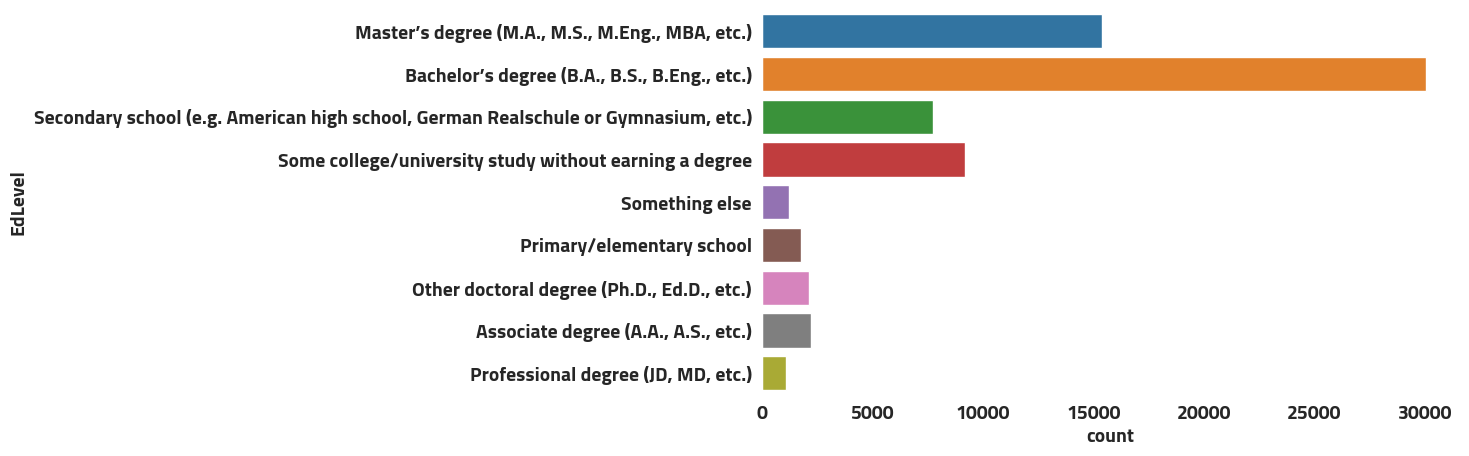

In [58]:
sns.countplot(data=survey_df, y="EdLevel")

In [59]:
survey_df["EdLevel"].value_counts()/survey_df["EdLevel"].value_counts().sum() # == survey_df["EdLevel"].value_counts(True)

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          0.423962
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       0.217187
Some college/university study without earning a degree                                0.129714
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    0.109609
Associate degree (A.A., A.S., etc.)                                                   0.031335
Other doctoral degree (Ph.D., Ed.D., etc.)                                            0.030362
Primary/elementary school                                                             0.024930
Something else                                                                        0.017241
Professional degree (JD, MD, etc.)                                                    0.015660
Name: EdLevel, dtype: float64

Text(0.5, 0, 'Percentage')

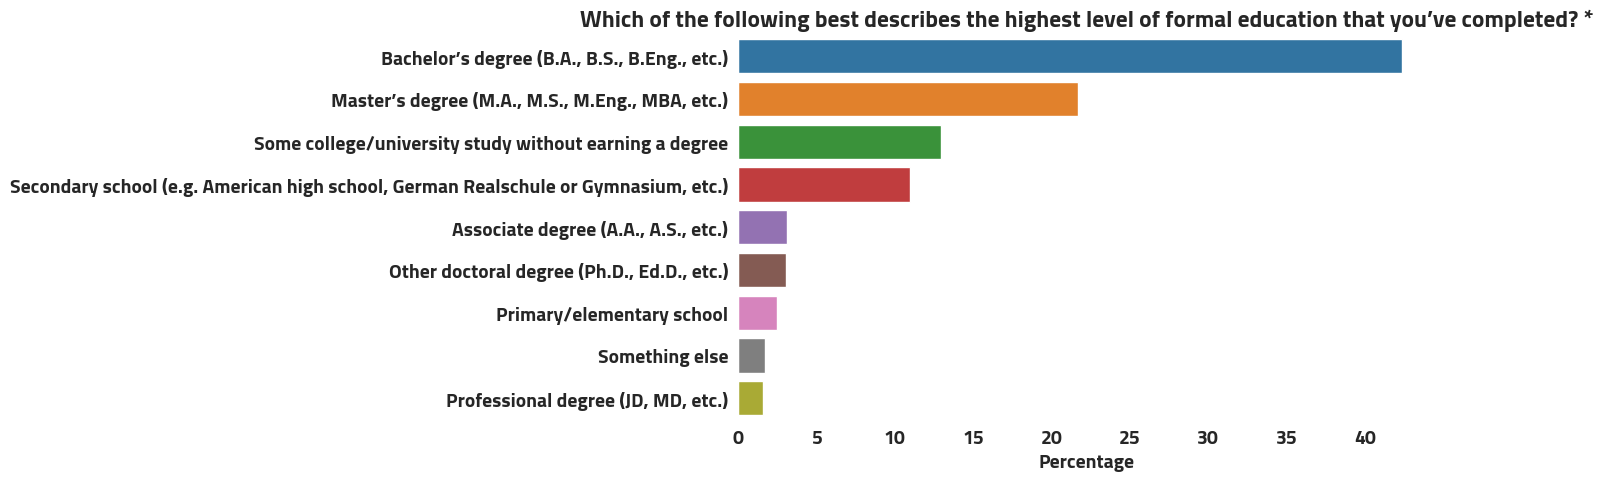

In [60]:
sns.barplot(x=(survey_df["EdLevel"].value_counts()/survey_df["EdLevel"].value_counts().sum())*100, 
            y=survey_df["EdLevel"].value_counts().index)
plt.title(schema_raw["EdLevel"])
plt.xlabel("Percentage")

Text(0.5, 0, 'Percentage')

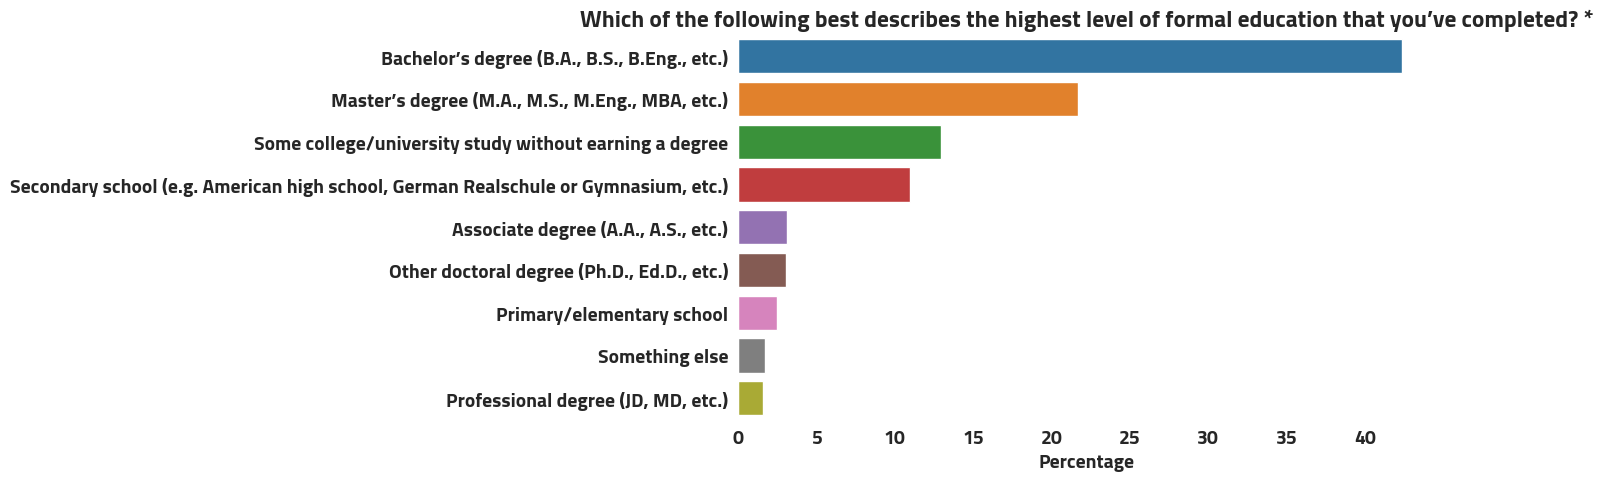

In [61]:
sns.barplot(x=(survey_df["EdLevel"].value_counts(True)*100), #value_count(True)를 하면 
            y=survey_df["EdLevel"].value_counts().index)
plt.title(schema_raw["EdLevel"])
plt.xlabel("Percentage")

In [62]:
schema_raw["Employment"]

'Which of the following best describes your current employment status?'

In [63]:
E = survey_df["Employment"].value_counts(True).head(15)*100

Text(0.5, 0, 'Percentage')

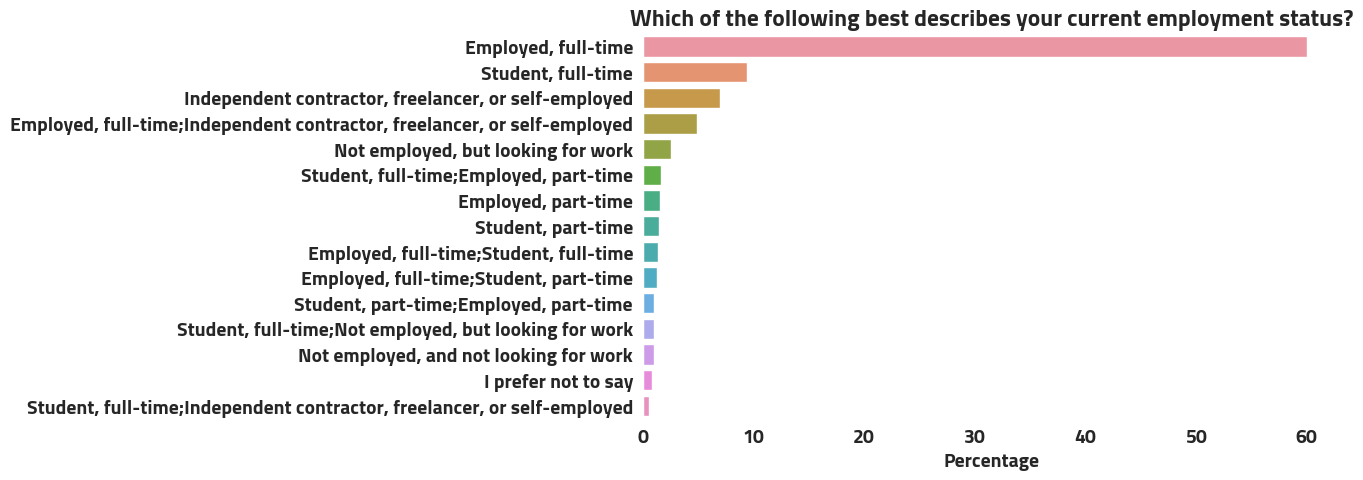

In [64]:
sns.barplot(x=E, y=E.index)
plt.title(schema_raw["Employment"])
plt.xlabel("Percentage")

In [65]:
schema_raw.DevType

'Which of the following describes your current job? Please select all that apply.'

In [135]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [146]:
survey_df.DevType.value_counts

<bound method IndexOpsMixin.value_counts of ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object>

In [302]:
# 방법 1
def split_multicolumn(col_series):
    # 반환할 DataFrame이자 최초의 col_series도 담는다.
    result_df = pd.DataFrame(col_series.values, index=col_series.index, columns=["DevType"])
    # result_df = col_series.to_frame() --> 위의 코드와 같다.
    # 기술 스텍 목록을 담았다가 마지막 반환할 때 인덱싱으로 활용
    options = []
    # NaN 값을 갖는 row를 제외하고 반복
    for idx, value  in col_series[col_series.notnull()].items():
        # value를 가져와 ';'를 기준으로 분리하여 각 기술 스텍 문자열 리스트를 만든다.
        for option in value.split(';'):
            # 현재 option이 result_df.columns에 없으면 추가한다.
            if option not in result_df.columns:
                options.append(option)
                result_df[option] = False
            # 파싱한 기술 스텍에 해당하는 column의 값에 True를 넣는다.
            result_df.at[idx, option] = True
            # result_df.loc[idx, option] = True
    return result_df[options]

In [303]:
dev_type_df = split_multicolumn(survey_df.DevType)
dev_type_df

,Data scientist or machine learning specialist,"Developer, front-end","Engineer, data","Engineer, site reliability","Developer, full-stack","Developer, back-end","Developer, desktop or enterprise applications","Developer, QA or test",Student,"Developer, mobile",Educator,Engineering manager,Database administrator,Academic researcher,DevOps specialist,Other (please specify):,"Developer, embedded applications or devices","Developer, game or graphics",Project manager,Cloud infrastructure engineer,Data or business analyst,Designer,Scientist,Product manager,"Senior Executive (C-Suite, VP, etc.)",System administrator,Blockchain,Marketing or sales professional,Security professional
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [290]:
survey_df.DevType.dropna().str.split(';').str[0].unique() #데이터가 큰 경우에는 가능

array(['Data scientist or machine learning specialist',
       'Developer, full-stack', 'Developer, front-end',
       'Developer, back-end',
       'Developer, desktop or enterprise applications',
       'Engineering manager', 'Engineer, data', 'Student',
       'Other (please specify):', 'Engineer, site reliability',
       'Developer, mobile', 'Marketing or sales professional',
       'Developer, embedded applications or devices', 'DevOps specialist',
       'Designer', 'Database administrator', 'System administrator',
       'Developer, QA or test', 'Product manager', 'Project manager',
       'Data or business analyst', 'Senior Executive (C-Suite, VP, etc.)',
       'Security professional', 'Educator', 'Academic researcher',
       'Developer, game or graphics', 'Cloud infrastructure engineer',
       'Scientist', 'Blockchain'], dtype=object)

In [188]:
temp = []
for _, value in survey_df["DevType"].dropna().items():
    temp.extend(value.split(';'))
temp
result = list(set(temp))
result

['Academic researcher',
 'Student',
 'Marketing or sales professional',
 'Other (please specify):',
 'Senior Executive (C-Suite, VP, etc.)',
 'Developer, full-stack',
 'Developer, back-end',
 'Designer',
 'DevOps specialist',
 'Security professional',
 'Blockchain',
 'Cloud infrastructure engineer',
 'Educator',
 'Developer, front-end',
 'Engineer, data',
 'System administrator',
 'Product manager',
 'Developer, desktop or enterprise applications',
 'Data or business analyst',
 'Engineering manager',
 'Developer, QA or test',
 'Developer, embedded applications or devices',
 'Data scientist or machine learning specialist',
 'Engineer, site reliability',
 'Developer, game or graphics',
 'Project manager',
 'Database administrator',
 'Scientist',
 'Developer, mobile']

In [237]:
# 방법 2
def split_multicolumn(Series):
    df = pd.DataFrame(False, columns = (Series.dropna().str.split(';').str[0].unique()), index = Series.index)
    # for idx, rep in Series[Series.notnull()].str.split(';').items:
    #     for one in rep:
    #         df.at[idx, one.strip()] = True
    for idx, rep in Series.str.split(';').items():
        # NaN이 아닌 값을 분기
        if isinstance(rep, list):
            for one in rep:
                df.at[idx, one.strip()] = True
        else :
            pass
    return df
split_multicolumn(survey_df['DevType'])

,Data scientist or machine learning specialist,"Developer, full-stack","Developer, front-end","Developer, back-end","Developer, desktop or enterprise applications",Engineering manager,"Engineer, data",Student,Other (please specify):,"Engineer, site reliability","Developer, mobile",Marketing or sales professional,"Developer, embedded applications or devices",DevOps specialist,Designer,Database administrator,System administrator,"Developer, QA or test",Product manager,Project manager,Data or business analyst,"Senior Executive (C-Suite, VP, etc.)",Security professional,Educator,Academic researcher,"Developer, game or graphics",Cloud infrastructure engineer,Scientist,Blockchain
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73266,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [285]:
#병창이 코드
def decomp(Sery):
    k = set()
    Sery = Sery.fillna('None')
    df = pd.DataFrame()
    # column 구하는 for문
    for i in Sery.value_counts().index:
        for j in i.split(';'):
            k.add(j) # set 말고 전체 column들을 구해서 일단 넣고 unique처리해서 column으로 쓸수도 있었겠다.
    # 빈 데이터프레임을 채우는 for문
    for i in list(k):
        df[i] = Sery.apply(lambda x : True if i in x else False) # i가 x안에 있다면 True
    return df
dev_type_df =  decomp(survey_df.DevType)
dev_type_df

,None,Academic researcher,Student,Marketing or sales professional,Other (please specify):,"Senior Executive (C-Suite, VP, etc.)","Developer, full-stack","Developer, back-end",Designer,DevOps specialist,Security professional,Blockchain,Cloud infrastructure engineer,Educator,"Developer, front-end","Engineer, data",System administrator,Product manager,"Developer, desktop or enterprise applications",Data or business analyst,Engineering manager,"Developer, QA or test","Developer, embedded applications or devices",Data scientist or machine learning specialist,"Engineer, site reliability","Developer, game or graphics",Project manager,Scientist,Database administrator,"Developer, mobile"
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73265,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
73266,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False


In [194]:
((survey_df.DevType.fillna('None')).value_counts().index).split(';')

AttributeError: 'Index' object has no attribute 'split'

In [195]:
(survey_df.DevType.fillna('None').value_counts().index)[0].split(';')

['None']

In [291]:
dev_type_df.sum().sort_values(ascending=False)
# sort_values() 오름차순
# sort_values(ascending=False) 역순

Developer, full-stack                            28433
Developer, back-end                              26369
Developer, front-end                             15739
Developer, desktop or enterprise applications     9451
Developer, mobile                                 7566
DevOps specialist                                 6093
Student                                           5503
Cloud infrastructure engineer                     5215
Database administrator                            4872
System administrator                              4828
Developer, embedded applications or devices       3871
Project manager                                   3844
Designer                                          3712
Engineer, data                                    3558
Engineering manager                               3534
Data scientist or machine learning specialist     3377
Data or business analyst                          3166
Developer, QA or test                             3045
Academic r

In [299]:
devtype_percentage = (dev_type_df.sum().sort_values(ascending=False)/dev_type_df.sum().sort_values(ascending=False).sum())*100
devtype_percentage

Developer, full-stack                            17.462842
Developer, back-end                              16.195185
Developer, front-end                              9.666503
Developer, desktop or enterprise applications     5.804569
Developer, mobile                                 4.646849
DevOps specialist                                 3.742169
Student                                           3.379806
Cloud infrastructure engineer                     3.202923
Database administrator                            2.992261
System administrator                              2.965238
Developer, embedded applications or devices       2.377472
Project manager                                   2.360889
Designer                                          2.279818
Engineer, data                                    2.185235
Engineering manager                               2.170495
Data scientist or machine learning specialist     2.074070
Data or business analyst                          1.9444

In [300]:
devtype_percentage.sum()

99.99999999999997

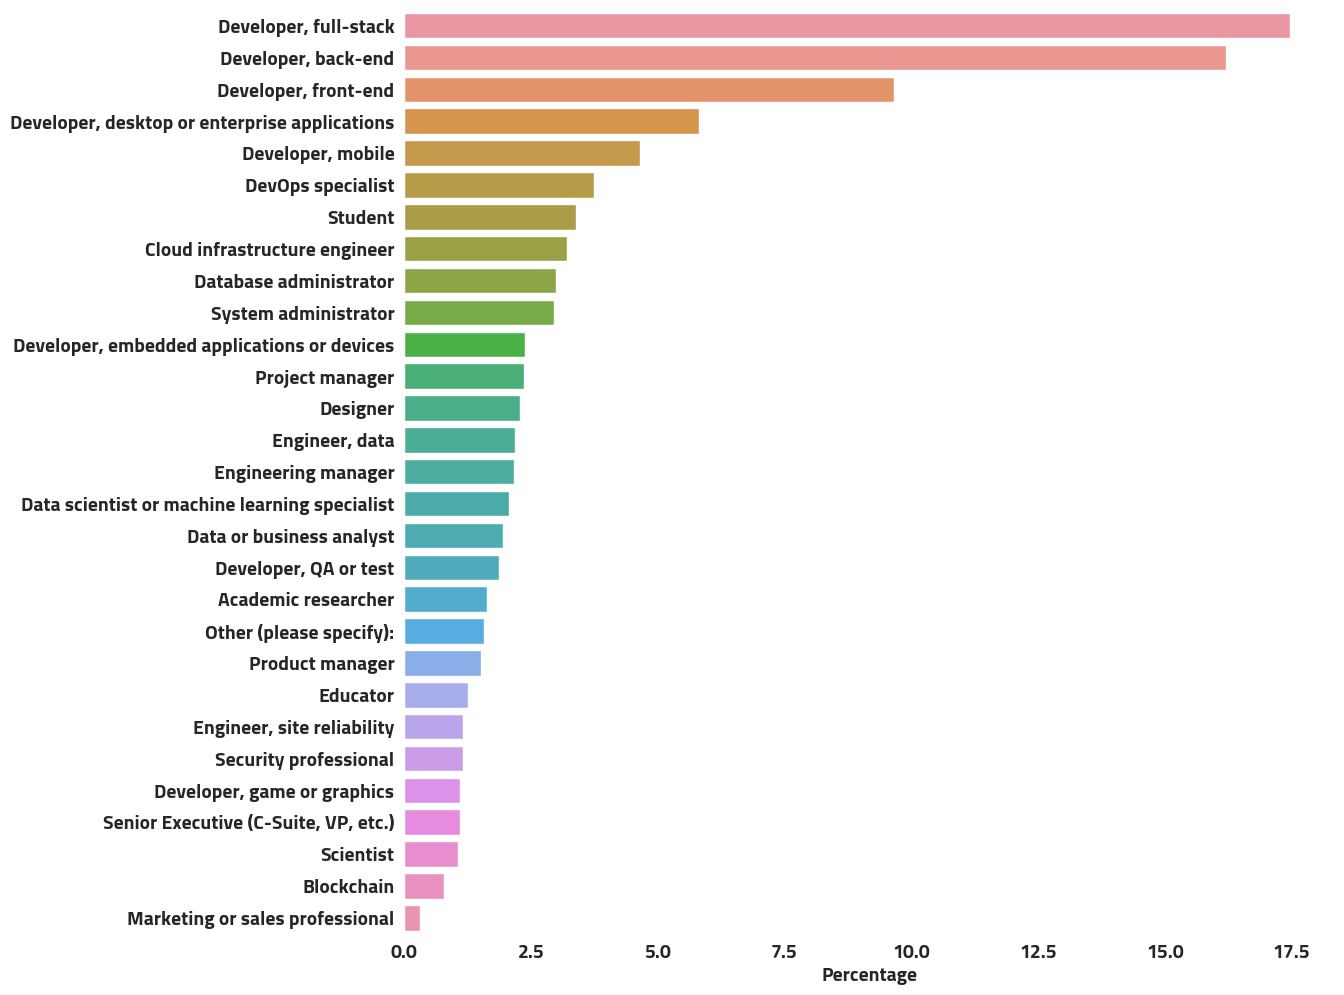

In [301]:
plt.figure(figsize=(12,12))
sns.barplot(x=devtype_percentage ,y=devtype_percentage.index)
plt.xlabel('Percentage')
plt.show()

In [305]:
lhw_type_df = split_multicolumn(survey_df.LanguageHaveWorkedWith)
lhw_percentage = lhw_type_df.sum().sort_values(ascending=False) / lhw_type_df.sum().sort_values(ascending=False).sum() * 100

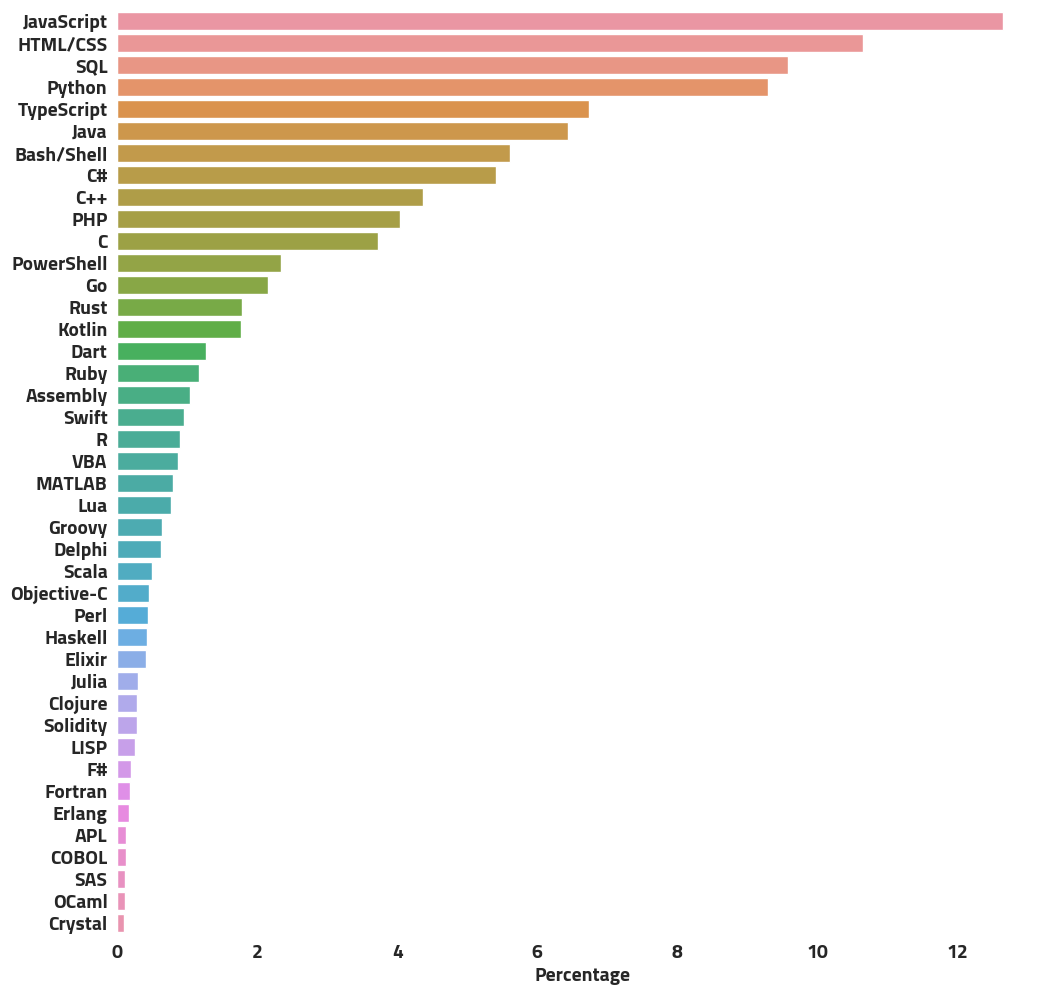

In [307]:
plt.figure(figsize=(12,12))
sns.barplot(x=lhw_percentage ,y=lhw_percentage.index)
plt.xlabel('Percentage')
plt.show()